In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
corr_bmi_char = df['bmi'].corr(df['charges'])

In [6]:
corr_bmi_char

0.1983409688336289

<Axes: xlabel='bmi', ylabel='Count'>

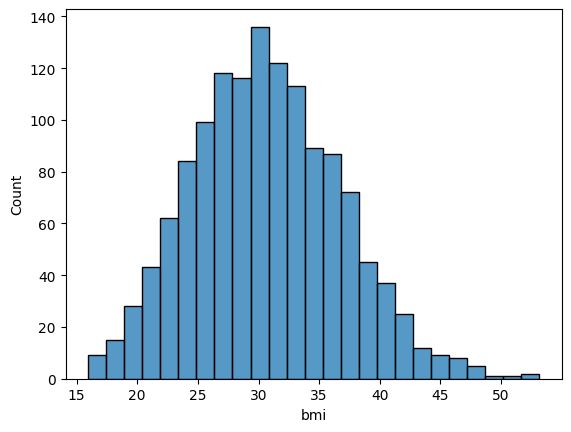

In [7]:
sns.histplot(x='bmi', data=df)

<Axes: ylabel='bmi'>

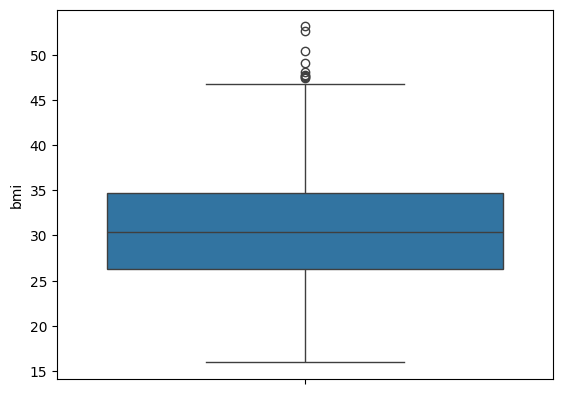

In [8]:
sns.boxplot(y='bmi', data=df)

<Axes: ylabel='charges'>

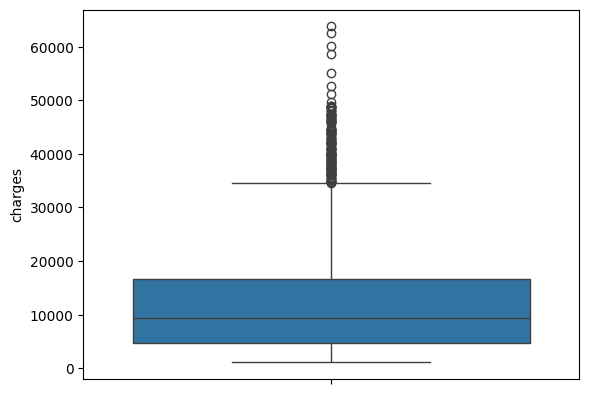

In [9]:
sns.boxplot(y='charges', data=df)

In [10]:
z_scores = (df['charges'] - df['charges'].mean()) / df['charges'].std()
outliers = df[z_scores > 1.8]

In [11]:
df_cleaned = df[~df.index.isin(outliers.index)]


In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1205 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1205 non-null   int64  
 1   sex       1205 non-null   object 
 2   bmi       1205 non-null   float64
 3   children  1205 non-null   int64  
 4   smoker    1205 non-null   object 
 5   region    1205 non-null   object 
 6   charges   1205 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 75.3+ KB


In [13]:
df = df_cleaned

In [14]:
corr_age = df['age'].corr(df['charges'])
corr_age

0.4050853387739914

In [15]:
df['smoker_int'] = df['smoker'].map({'yes':1, 'no':0})

In [16]:
corr_smoke = df['smoker_int'].corr(df['charges'])
corr_smoke

0.6195996407598743

In [17]:
df['gender_int'] = df['sex'].map({'male':1, 'female':0})

In [18]:
corr_gender = df['gender_int'].corr(df['charges'])
corr_gender

-0.012245456932933349

In [19]:
corr_child = df['children'].corr(df['charges'])
corr_child

0.06870437449069702

In [20]:
df.pop('region')

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1205, dtype: object

In [21]:
df.pop('smoker')

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1205, dtype: object

In [22]:
df.pop('sex')

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1205, dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1205 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1205 non-null   int64  
 1   bmi         1205 non-null   float64
 2   children    1205 non-null   int64  
 3   charges     1205 non-null   float64
 4   smoker_int  1205 non-null   int64  
 5   gender_int  1205 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 65.9 KB


# Test train Split 

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
X = df.drop('charges', axis=1)
y = df['charges']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=500)

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
model = DecisionTreeRegressor(max_depth=3)

In [58]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [59]:
y_pred = model.predict(X_test)

In [60]:
y_test.shape

(482,)

In [61]:
y_pred.shape

(482,)

In [62]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

4214.026178567231

In [38]:
max_depths = [1,2,3,4,5,6]
rmse_scores = []


In [39]:
for depth in max_depths:
    model = DecisionTreeRegressor(max_depth=depth)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring = 'neg_mean_squared_error')
    rmse = np.sqrt(-scores.mean())
    rmse_scores.append(rmse)

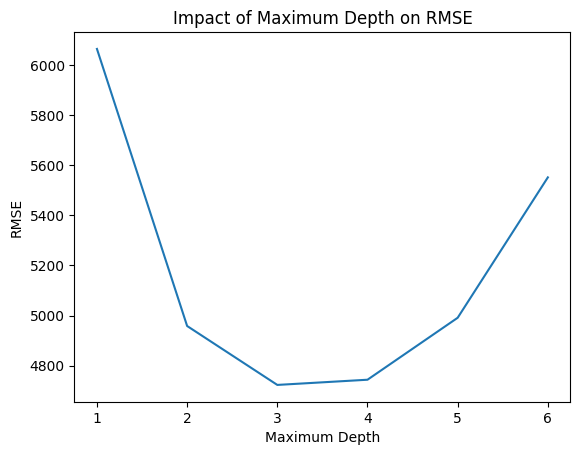

In [40]:
plt.plot(max_depths, rmse_scores)
plt.xlabel("Maximum Depth")
plt.ylabel("RMSE")
plt.title("Impact of Maximum Depth on RMSE")
plt.show()